#KELOMPOK 30
#10122438-Fachri Rachmansyah Putra
#10122843-Muhammad Alvito Ramadhan
#10123037-Adib Surya Saputra
#10123320-Devi Andini Sastro
#11123033-Pradipta Zulva Nur Hansyah



# Project Guideline

Hi teman-teman! Silakan menggunakan template notebook ini untuk mengerjakan projectmu.

<br>

**Informasi tambahan,**
1. Copy notebook ini untuk mulai mengerjakan Projectmu.
2. Kamu bebas untuk menambahkan cell pada notebook.

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mengambil file .csv dari Google Drive kamu.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FIKTI/housing_data.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Mengecek value yang dimiliki oleh tiap variabel kategori:
print('mainroad: ',df['mainroad'].unique())
print('guestroom: ',df['guestroom'].unique())
print('basement: ',df['basement'].unique())
print('hotwaterheating: ',df['hotwaterheating'].unique())
print('airconditioning: ',df['airconditioning'].unique())
print('prefarea: ',df['prefarea'].unique())
print('furnishingstatus: ',df['furnishingstatus'].unique())

mainroad:  ['yes' 'no']
guestroom:  ['no' 'yes']
basement:  ['no' 'yes']
hotwaterheating:  ['no' 'yes']
airconditioning:  ['yes' 'no']
prefarea:  ['yes' 'no']
furnishingstatus:  ['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
# Melakukan konversi data kategori biner (Yes/No) ke numerik
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
# Melakukan konversi data kategori furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [ ]:
# Melakukan one hot encoding pada status furnishing menjadi numerik

bool_cols = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in bool_cols:
    df[col] = df[col].astype(int)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


Melihat Korelasi

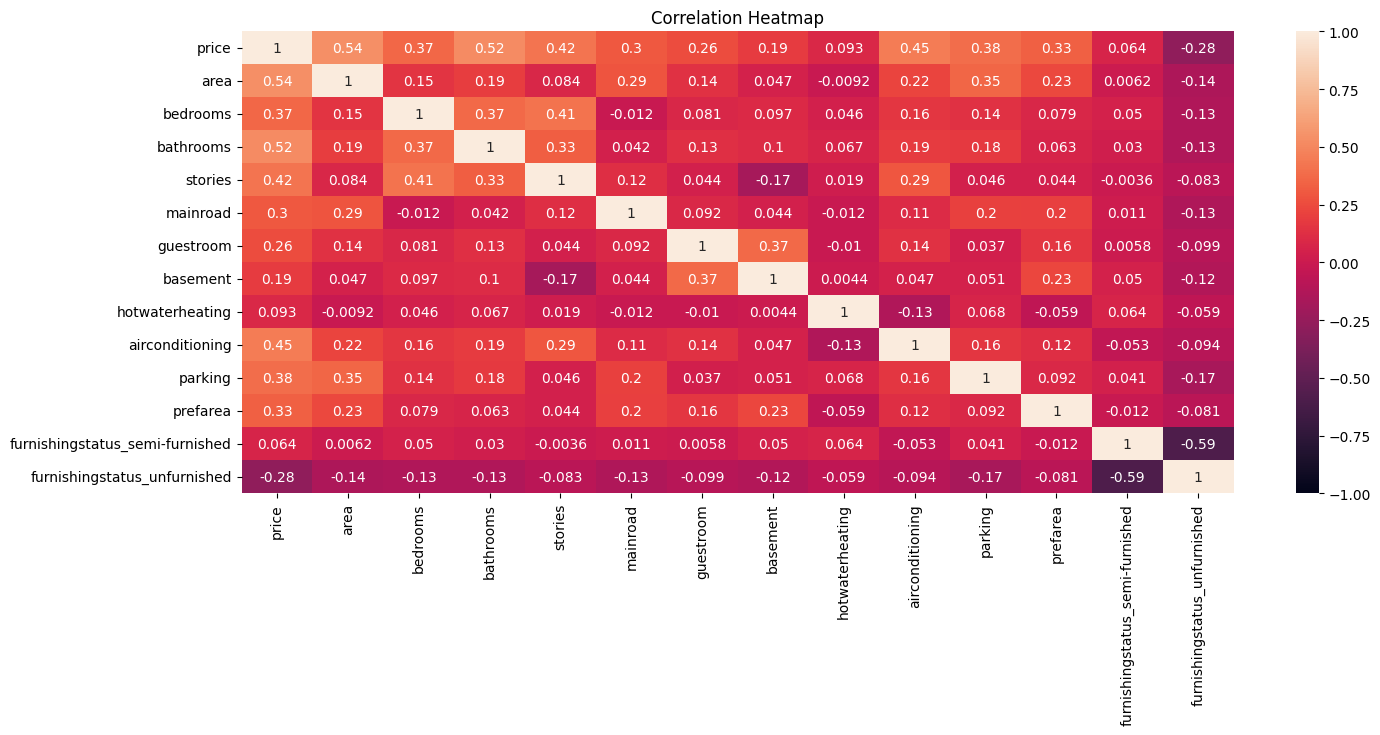

In [ ]:
cor = df.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cor, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap');

In [ ]:
# Melihat korelasi dari yang paling besar terhadap harga rumah
cor['price'].sort_values(ascending=False)

,price
price,1.000000
area,0.535997
bathrooms,0.517545
airconditioning,0.452954
stories,0.420712
parking,0.384394
bedrooms,0.366494
prefarea,0.329777
mainroad,0.296898
guestroom,0.255517


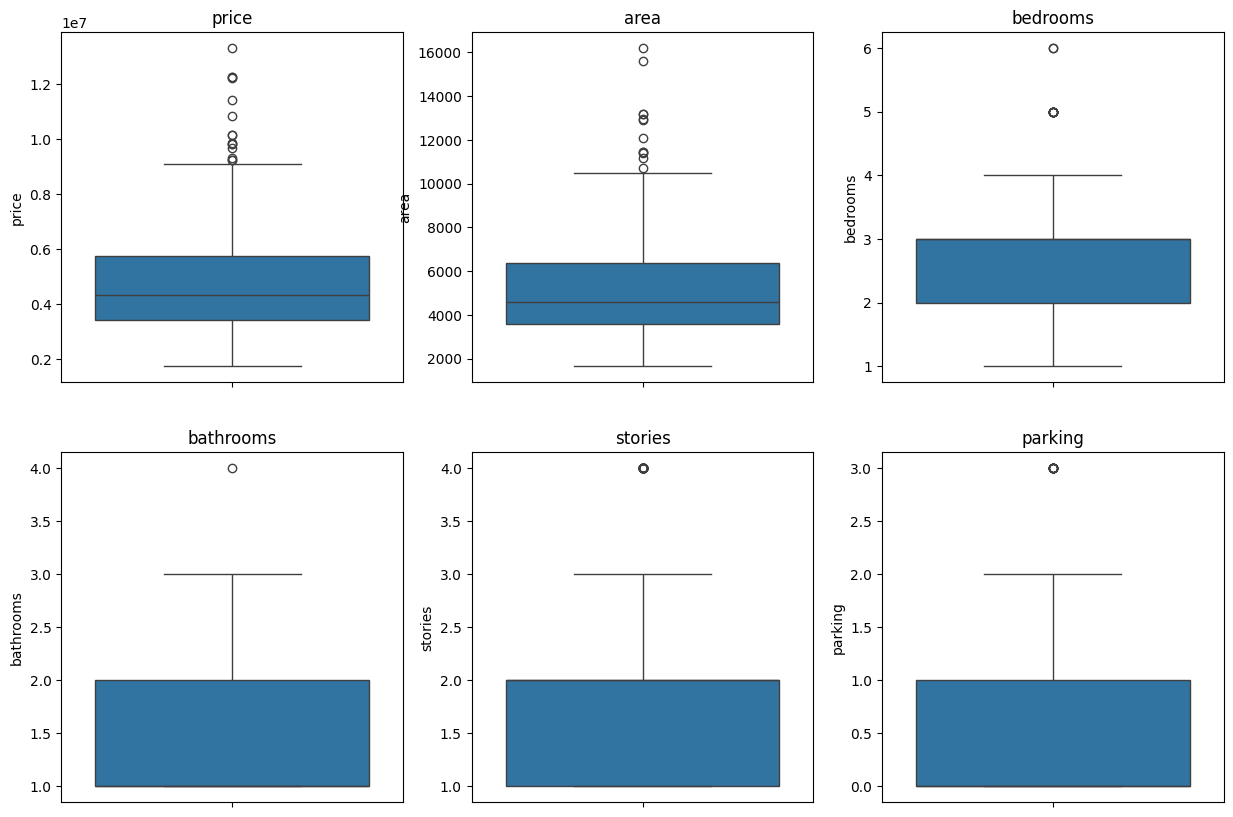

In [ ]:
num_col = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15,10))

for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')

In [ ]:
# Menghapus outlier pada price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

In [ ]:
# Menghapus outlier pada area
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['area'] >= Q1 - 1.5 * IQR) & (df['area'] <= Q3 + 1.5 * IQR)]

In [ ]:
df.shape

(517, 14)

In [ ]:
#log kepada variabel target untuk menangani skewness
df_log = df.copy()
df_log['price_log'] = np.log(df_log['price'])

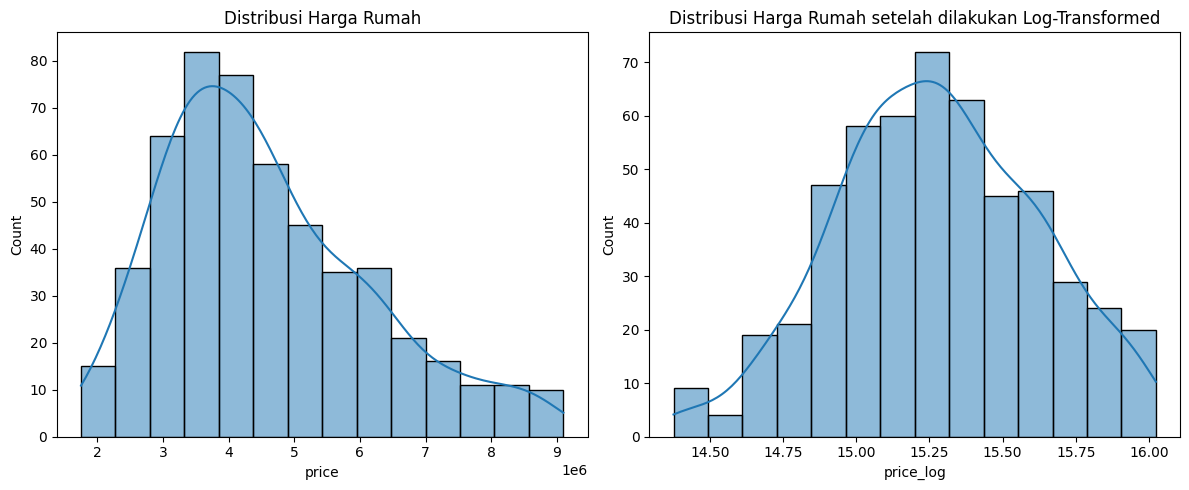

In [ ]:
#perbedaan transformasi log dengan tidak
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Rumah')

plt.subplot(1, 2, 2)
sns.histplot(df_log['price_log'], kde=True)
plt.title('Distribusi Harga Rumah setelah dilakukan Log-Transformed')
plt.tight_layout()
plt.show()

Standarisasi Area

In [ ]:
num_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = StandardScaler()
df_log = df_log.copy()
df_log[num_col] = scaler.fit_transform(df_log[num_col])

In [ ]:
df_log.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price_log
15,9100000,0.624429,1.447384,-0.561652,0.237201,1,0,1,0,0,1.597777,0,1,0,16.023785
16,9100000,0.961991,1.447384,1.589268,0.237201,1,1,1,0,1,0.410922,1,0,1,16.023785
17,8960000,2.030937,0.079381,1.589268,2.551031,1,0,0,0,1,1.597777,0,0,0,16.008281
18,8890000,-0.163216,0.079381,1.589268,0.237201,1,1,0,0,1,1.597777,0,0,0,16.000438
19,8855000,0.860722,0.079381,1.589268,0.237201,1,0,0,0,1,0.410922,1,1,0,15.996493


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

In [ ]:
num_col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_col = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

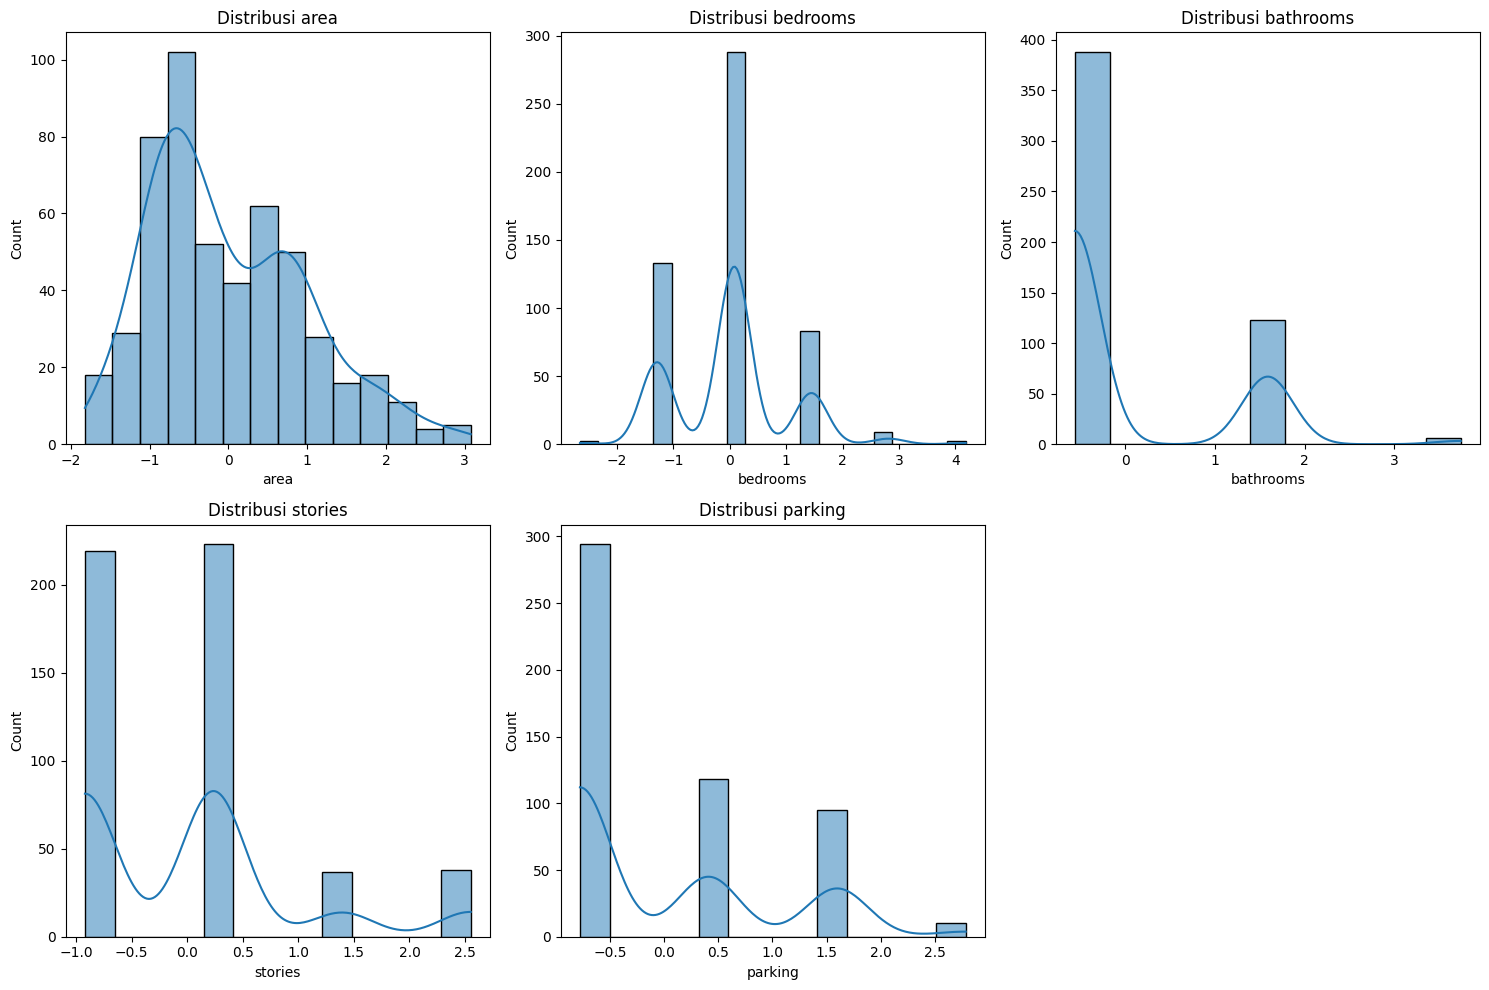

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_log[col], kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

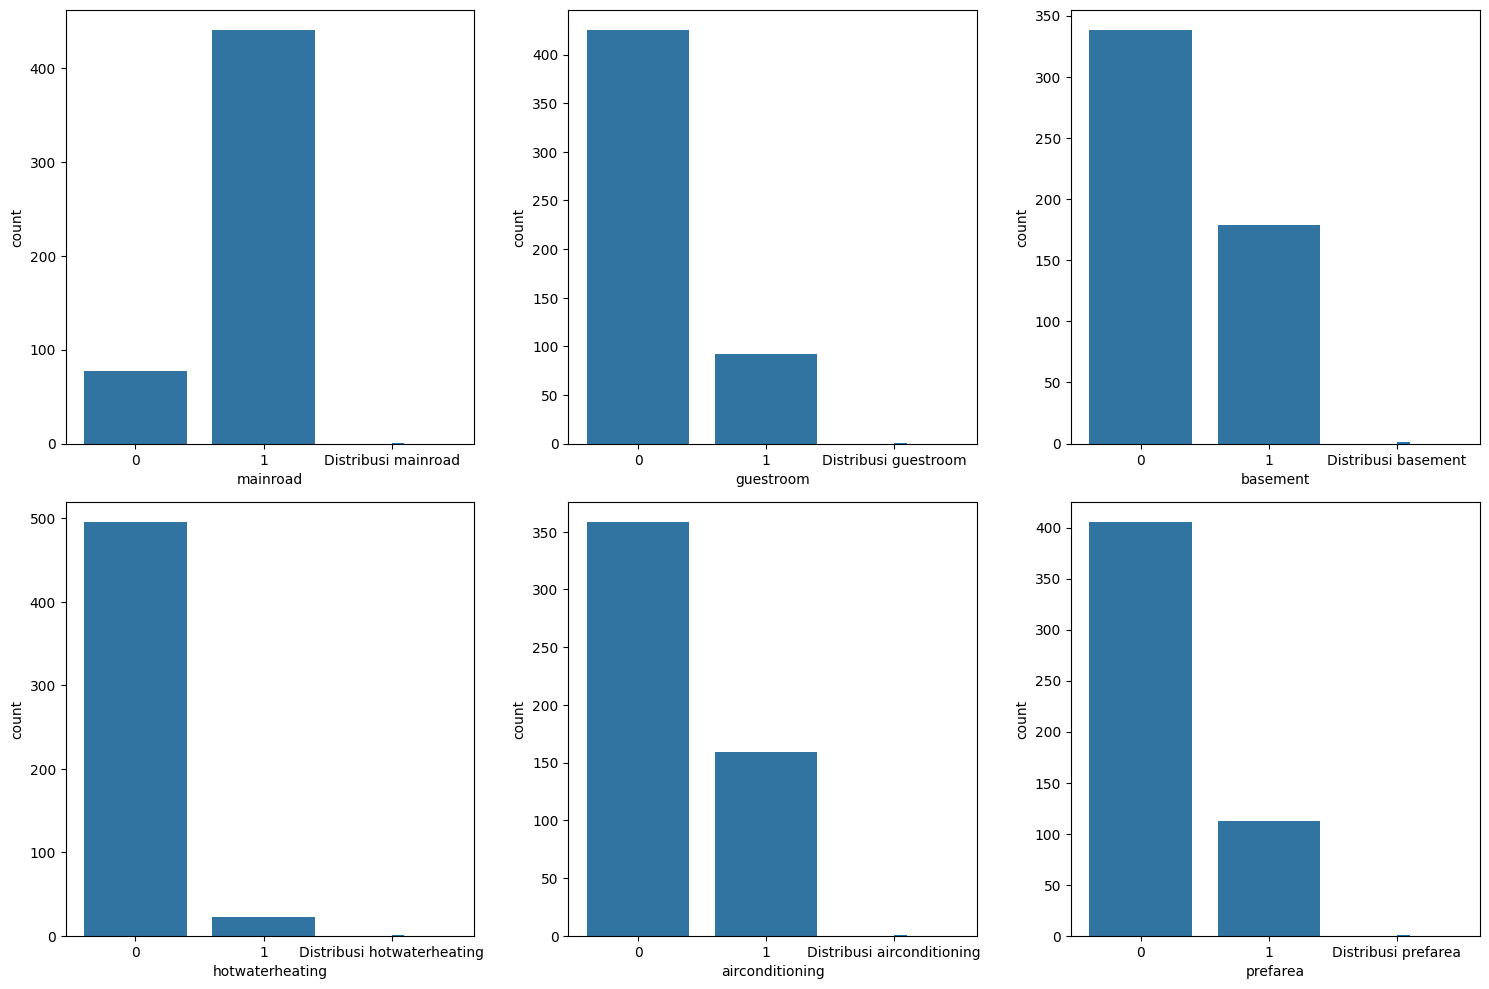

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df_log)
    plt.hist(f'Distribusi {col}')

plt.tight_layout()
plt.show()

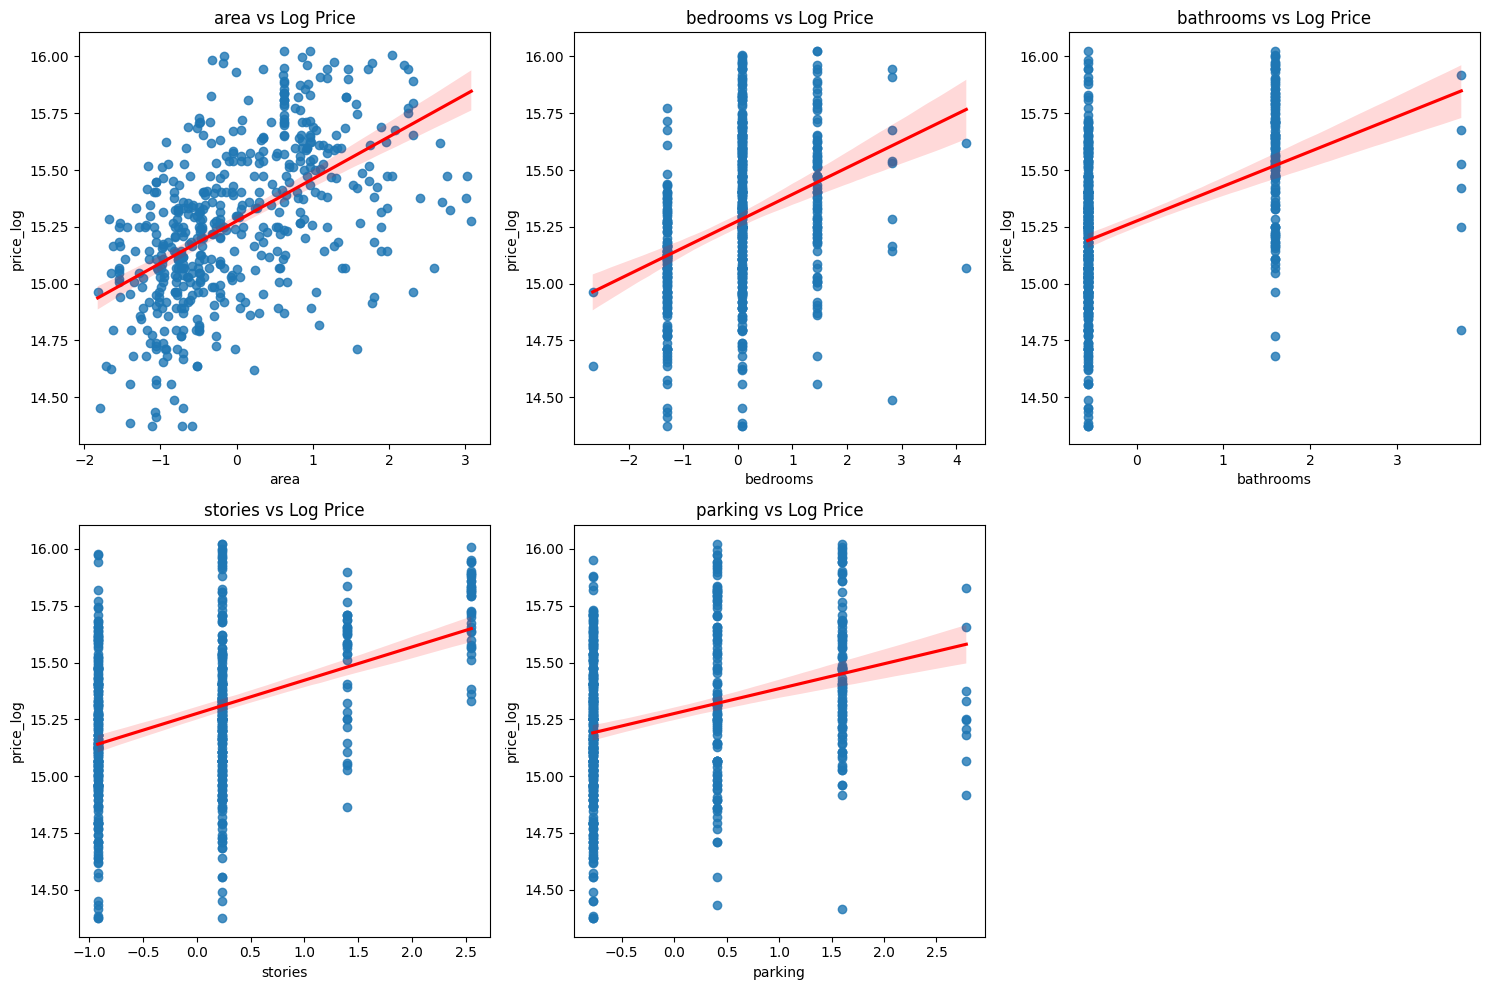

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=col, y='price_log', data=df_log, line_kws={'color':'red'})
    plt.title(f'{col} vs Log Price')
plt.tight_layout()
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [ ]:
df_log.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'price_log'],
      dtype='object')

In [ ]:
target = 'price_log'

In [ ]:
# Memisahkan variabel fitur dan target
X = df_log.drop(columns=[target,'price'])
y = df_log[target]

In [ ]:
# Membagi dataset menjadi dua bagian: data untuk training (latihan) dan data untuk testing (pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [ ]:
# Inisialisasi model
lr_model = LinearRegression()

In [ ]:
# Menggunakan model dengan training model
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Membuat prediksi model dengan test set
y_pred = lr_model.predict(X_test)

In [ ]:
# Melihat intercept
lr_model.intercept_

np.float64(15.107641188163216)

In [ ]:
# Melihat koefisien
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

coefficients

,Feature,Coefficient
8,airconditioning,0.167748
7,hotwaterheating,0.137262
4,mainroad,0.119052
12,furnishingstatus_unfurnished,-0.115424
0,area,0.099863
6,basement,0.088199
10,prefarea,0.087038
3,stories,0.076871
2,bathrooms,0.061307
5,guestroom,0.042527


In [ ]:
# Kenaikan AC
np.exp(0.154469) - 1

np.float64(0.16703809931564817)

In [ ]:
# Rumah tanpa Furnish
np.exp(-0.108652) - 1

np.float64(-0.10295746601135569)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [ ]:
# Mengkalkulasi metrics evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
# Mengeluarkan hasil
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.6161
MAE: 0.1676
MSE: 0.0475
RMSE: 0.2180


In [ ]:
#MAE
np.expm1(0.1676)

np.float64(0.18246353062586385)